# Bangalore House Price Prediction - Supervised Regression Problem

## Data Preprocessing

**** Project Steps*****
-----------------------------
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Save the Model for further requirements


# 1. Business Problem
The main goal of this project is to predict the price of the Bangalore house using the data provided in form of csv file

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset 
I downloaded the csv file from below link
<br>
Source: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data


In [2]:
# lets take whole dataset into a dataframe and term it as raw dataframe coz it hasnt been cleaned

In [3]:
df_raw = pd.read_csv("Bengaluru_House_Data.csv")
df_raw.shape

(13320, 9)

In [4]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


## 3. Exploratory Data Analysis

In [6]:
df = df_raw.copy() # get the copy of raw data

In [7]:
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# We have only 3 numerical features - bath, balcony and price
# 6 categorical features - area type, availability, size, society, and total_srft
# Target Feature ===> "price" 
# Price in lakh

In [9]:
df.describe()
# observe 75% and max value it shows huge diff

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


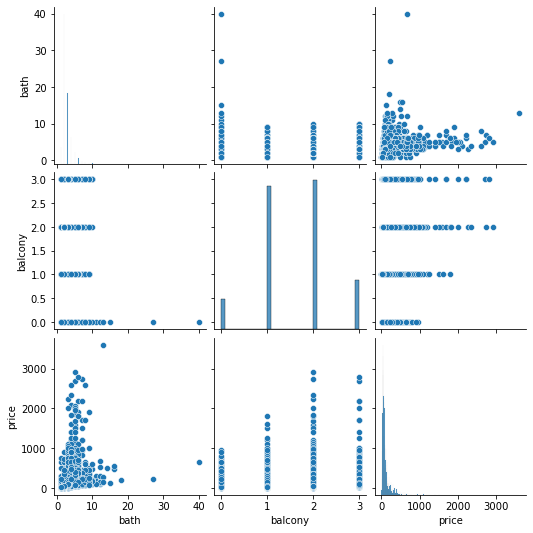

In [10]:
sns.pairplot(df)

# bath and price have slightly linear correlation with some outliers

In [11]:
# Lets look at value count of each feature
def value_count(df):
    for var in df.columns:
        print("===============================")
        print(var)
        print("===============================")
        print(df[var].value_counts())
        print("-----------------------------------------------------------------------------")

In [12]:
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
-----------------------------------------------------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
14-Nov               1
14-Jul               1
16-Nov               1
15-Dec               1
Name: availability, Length: 81, dtype: int64
-----------------------------------------------------------------------------
location
Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Kengeri Satellite Town ( BDA SITE)      1
Dhanalakshmi Layout                     1
Mathikere SBM colony            

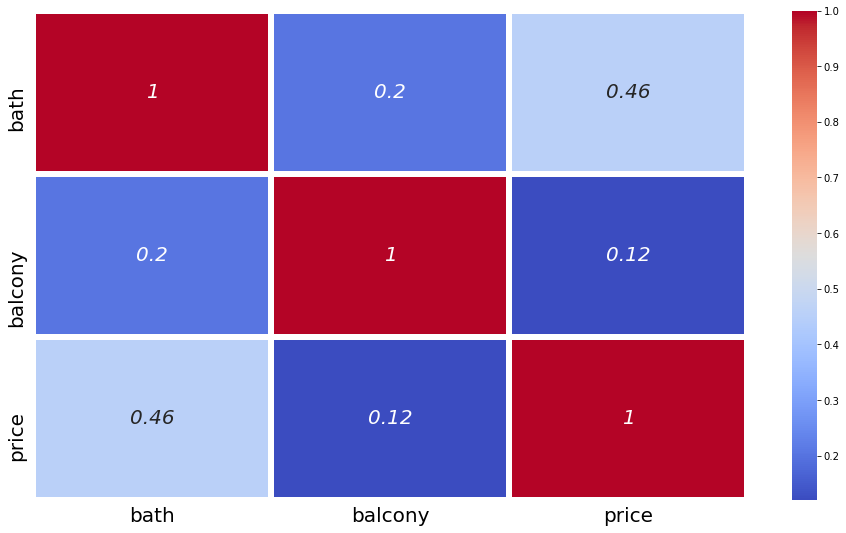

In [13]:
# correlation heatmap
# for correaltion heatmap lets take the numerical features in one variable list "num_vars"
num_vars = ["bath", "balcony", "price"]
plt.figure(figsize=(16,9))
annot_kws = {'fontsize':20,'fontstyle':'italic'}
hmap = sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True,linewidth = 5,annot_kws=annot_kws)
hmap.tick_params(color = 'w',labelsize = 20, )
plt.show()
# correlation of bath is greater than a balcony with price
# we can now see that bath is very important feature for price prediction

# 4. Preare Data for Machine Learning Model - 
# Data Preprocessing

## Data cleaning

In [14]:
df.isnull().sum() # find the how much missing data available wrt particular feature(column)

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
df.isnull().mean()*100 
# % of missing value
# Trues are added and divided by total number of elements presents -> mean
# then multiplied by 100 gives percentage of null present

# society has 41.3% missing value (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

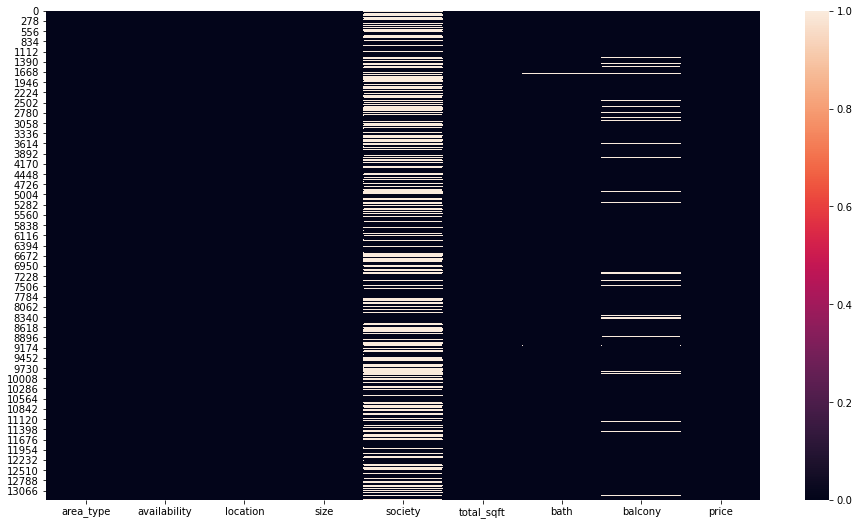

In [16]:
# visualize missing value using heatmap to get idea where is the value missing
# white represents the null value

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

In [17]:
# Drop --> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [18]:
# fill mean value in --> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [19]:
# Rows with any feature values as NaN
df[df2.isnull().any(axis = 1)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.00
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.50
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.82
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.53
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.00
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.00
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.44
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.00
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.00


In [20]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 8)

In [21]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Feature Engineering

In [23]:
# to show all the columns and rows in dataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Converting 'total_sqft' cat feature in numeric

In [24]:
df3['total_sqft'].value_counts()

# here we observe that 'total_sqft' contain string value in diff format
# float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds, 2Acres

# best strategy is to convert it into number by spliting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
1225                  48
4000                  48
1175                  48


In [25]:
total_sqft_int = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
        except:
            total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan

In [26]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df

In [27]:
# join df4 and total_srft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [28]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [29]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [30]:
# drop na value bcause we have certain NaN values intoduced due to different types string in total_sqft
df6 = df5.dropna()
df6.shape

(13200, 9)

In [31]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


## Working on  "size"  feature

shows the number of rooms

In [32]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
14 BHK           1
13 BHK           1
12 Bedroom       1
19 BHK           1
27 BHK           1
43 Bedroom       1
16 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [33]:
"""
in  size feature we assume that 
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove sufix text
"""
size_int = []
for str_val in df6['size']:
    temp=[]
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice = ",str_val)

In [34]:
# lets reset index as we droped the NaN entries recently
df6 = df6.reset_index(drop=True)

In [35]:
# join df6 and list size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [36]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


## Finding Outlier and Removing

In [37]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* bath *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


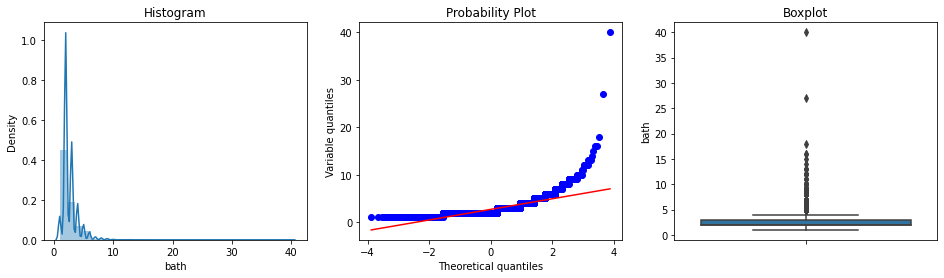

******* balcony *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


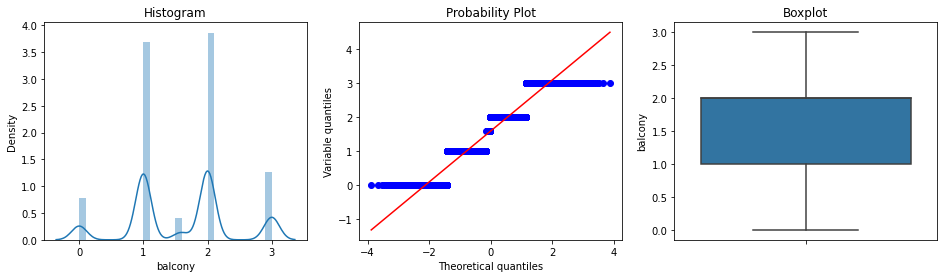

******* total_sqft_int *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


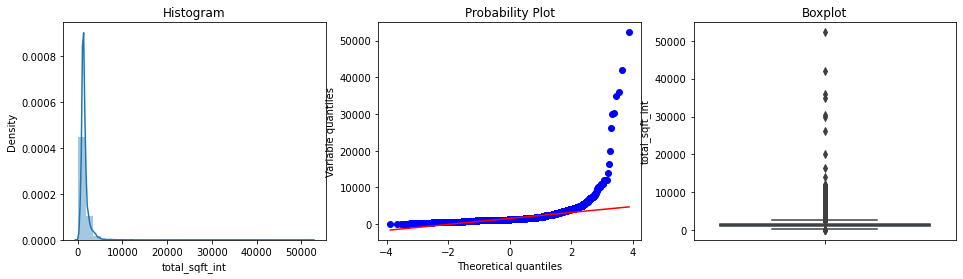

******* bhk *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


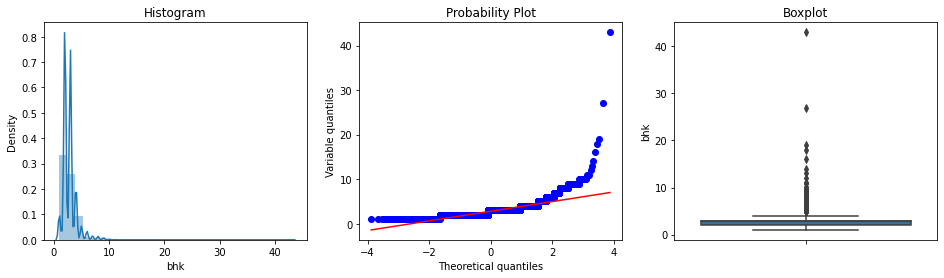

******* price *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


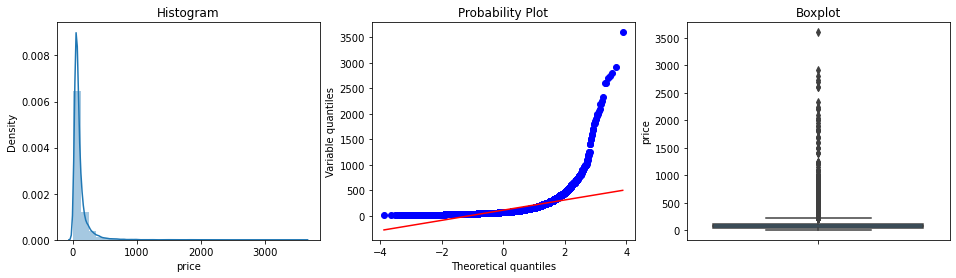

In [38]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [39]:
# here we consider  1 BHK requierd min 280 sqft area
df7[df7['total_sqft_int']/df7['bhk'] < 280]

# no we found outliers 

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.00,1020.0,6
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.00,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.00,1407.0,6
67,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350,7.0,0.000000,85.00,1350.0,8
69,Plot Area,Ready To Move,Double Road,3 Bedroom,500,3.0,2.000000,100.00,500.0,3
77,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460,1.0,0.000000,22.00,460.0,2
87,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710,6.0,3.000000,160.00,710.0,6
117,Plot Area,Ready To Move,Hennur Road,2 Bedroom,276,3.0,3.000000,23.00,276.0,2
127,Plot Area,Ready To Move,Vishwapriya Layout,7 Bedroom,950,7.0,0.000000,115.00,950.0,7
147,Plot Area,Ready To Move,Dinnur,6 Bedroom,1034,5.0,1.584376,185.00,1034.0,6


In [40]:
# if 1 BHK total_sqft are < 280 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 280)]
df8.shape

(12501, 10)

In [41]:
# create new feature that is price per squre foot 
# it help to find the outliers

#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()

<ipython-input-41-a88fdd7593d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [42]:
df8.price_per_sqft.describe()

#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235

count     12501.000000
mean       6324.827492
std        4189.979459
min         267.829813
25%        4210.526316
50%        5298.013245
75%        6938.159879
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
for i,j in df.groupby('location'):
    print(i)
    print("-------------")
    print(j)


 Anekal
-------------
           area_type   availability location  size society total_sqft  bath  \
2557  Built-up  Area  Ready To Move   Anekal  1 RK     NaN        351   1.0   

      balcony  price  
2557      1.0   16.0  
 Banaswadi
-------------
                 area_type   availability    location  size  society  \
8385  Super built-up  Area  Ready To Move   Banaswadi  1 RK  Krntsee   

     total_sqft  bath  balcony  price  
8385        527   1.0      0.0   35.0  
 Basavangudi
-------------
                 area_type   availability      location  size society  \
7638  Super built-up  Area  Ready To Move   Basavangudi  1 RK     NaN   

     total_sqft  bath  balcony  price  
7638        670   1.0      1.0   50.0  
 Bhoganhalli
-------------
                 area_type availability      location  size  society  \
2486  Super built-up  Area       19-Dec   Bhoganhalli  1 RK  Rosha I   

     total_sqft  bath  balcony  price  
2486        296   1.0      0.0  22.89  
 Devarabeesana Ha

                  area_type   availability              location       size  \
1269             Plot  Area  Ready To Move  5th Block Hbr Layout  6 Bedroom   
1972   Super built-up  Area  Ready To Move  5th Block Hbr Layout      2 BHK   
2020   Super built-up  Area  Ready To Move  5th Block Hbr Layout      3 BHK   
3692             Plot  Area  Ready To Move  5th Block Hbr Layout  5 Bedroom   
5085             Plot  Area  Ready To Move  5th Block Hbr Layout  4 Bedroom   
5754   Super built-up  Area  Ready To Move  5th Block Hbr Layout      2 BHK   
6937             Plot  Area  Ready To Move  5th Block Hbr Layout  9 Bedroom   
10354  Super built-up  Area  Ready To Move  5th Block Hbr Layout      2 BHK   
10566        Built-up  Area  Ready To Move  5th Block Hbr Layout  5 Bedroom   
11758  Super built-up  Area  Ready To Move  5th Block Hbr Layout      5 BHK   
11908        Built-up  Area  Ready To Move  5th Block Hbr Layout      6 BHK   
12905            Plot  Area  Ready To Move  5th Bloc

                  area_type   availability          location   size society  \
5269   Super built-up  Area  Ready To Move  Atmananda Colony  2 BHK     NaN   
7512   Super built-up  Area  Ready To Move  Atmananda Colony  2 BHK     NaN   
12203  Super built-up  Area  Ready To Move  Atmananda Colony  2 BHK     NaN   

      total_sqft  bath  balcony  price  
5269        1127   2.0      2.0   55.0  
7512        1200   2.0      1.0   56.0  
12203       1125   2.0      2.0   55.0  
Attibele
-------------
                  area_type   availability  location       size  society  \
171    Super built-up  Area  Ready To Move  Attibele      1 BHK  Jae 1hu   
265          Built-up  Area  Ready To Move  Attibele  4 Bedroom  Natic T   
558          Built-up  Area  Ready To Move  Attibele      2 BHK  Jae 2hu   
942          Built-up  Area  Ready To Move  Attibele      1 BHK  Jae 2hu   
1016         Built-up  Area  Ready To Move  Attibele      1 BHK  Jae 1hu   
1510         Built-up  Area  Ready To Mo

        area_type   availability      location       size society total_sqft  \
11668  Plot  Area  Ready To Move  Bapuji Nagar  4 Bedroom     NaN       1125   

       bath  balcony  price  
11668   3.0      2.0  126.0  
Basapura
-------------
                  area_type   availability  location   size  society  \
1088   Super built-up  Area  Ready To Move  Basapura  2 BHK  RMncy R   
1454         Built-up  Area  Ready To Move  Basapura  2 BHK  Krtiqa    
1913         Built-up  Area  Ready To Move  Basapura  2 BHK      NaN   
2364   Super built-up  Area  Ready To Move  Basapura  2 BHK  Krtiqa    
3642   Super built-up  Area  Ready To Move  Basapura  2 BHK  Jaangm    
5203   Super built-up  Area  Ready To Move  Basapura  3 BHK  Saavenc   
7499   Super built-up  Area  Ready To Move  Basapura  3 BHK  Amageru   
9058   Super built-up  Area  Ready To Move  Basapura  2 BHK  Krtiqa    
9287   Super built-up  Area  Ready To Move  Basapura  3 BHK  Jaangm    
10801  Super built-up  Area  Ready T

11467       1700   3.0      2.0   55.0  
CHIKKATIRUPATHI
-------------
      area_type   availability         location       size society total_sqft  \
175  Plot  Area  Ready To Move  CHIKKATIRUPATHI  3 Bedroom     NaN       1500   

     bath  balcony  price  
175   3.0      2.0  100.0  
CMH Road
-------------
                 area_type availability  location   size society total_sqft  \
7516  Super built-up  Area       20-Dec  CMH Road  3 BHK     NaN       2665   

      bath  balcony  price  
7516   3.0      1.0  350.0  
CQAL LAYOUT C BLOCK
-------------
       area_type   availability             location       size society  \
4043  Plot  Area  Ready To Move  CQAL LAYOUT C BLOCK  3 Bedroom     NaN   

     total_sqft  bath  balcony  price  
4043       1200   3.0      1.0  160.0  
CQAL Layout
-------------
                 area_type   availability     location       size society  \
4412            Plot  Area  Ready To Move  CQAL Layout  4 Bedroom     NaN   
5490  Super built-up  Are

                  area_type   availability                 location  \
1211             Plot  Area  Ready To Move  Classic Paradise Layout   
12241  Super built-up  Area  Ready To Move  Classic Paradise Layout   

            size society total_sqft  bath  balcony  price  
1211   5 Bedroom     NaN       1560   5.0      1.0  145.0  
12241      2 BHK     NaN       1210   2.0      2.0   53.0  
Cleveland Town
-------------
                 area_type   availability        location   size  society  \
3197        Built-up  Area  Ready To Move  Cleveland Town  3 BHK  Coner C   
5178  Super built-up  Area  Ready To Move  Cleveland Town  2 BHK  Lehidrc   

     total_sqft  bath  balcony  price  
3197       1991   3.0      2.0  160.0  
5178       1100   2.0      1.0   85.0  
Coconut Garden
-------------
                  area_type   availability        location       size society  \
1297   Super built-up  Area  Ready To Move  Coconut Garden      3 BHK     NaN   
12441            Plot  Area  Ready

                  area_type   availability         location       size  \
26     Super built-up  Area  Ready To Move  Electronic City      2 BHK   
29     Super built-up  Area  Ready To Move  Electronic City      3 BHK   
91     Super built-up  Area         18-Dec  Electronic City      2 BHK   
113    Super built-up  Area  Ready To Move  Electronic City      3 BHK   
132    Super built-up  Area  Ready To Move  Electronic City      2 BHK   
167    Super built-up  Area  Ready To Move  Electronic City      3 BHK   
168          Built-up  Area  Ready To Move  Electronic City      2 BHK   
172    Super built-up  Area         18-Apr  Electronic City      2 BHK   
173    Super built-up  Area  Ready To Move  Electronic City      3 BHK   
179          Built-up  Area  Ready To Move  Electronic City      2 BHK   
184    Super built-up  Area  Ready To Move  Electronic City      2 BHK   
187          Built-up  Area  Ready To Move  Electronic City      2 BHK   
217    Super built-up  Area  Ready To 

                  area_type   availability           location   size  society  \
901    Super built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Soinequ   
2043         Built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Soweray   
2498   Super built-up  Area  Ready To Move  Green Glen Layout  4 BHK      NaN   
2595   Super built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Solia D   
3169   Super built-up  Area  Ready To Move  Green Glen Layout  4 BHK      NaN   
3310         Built-up  Area  Ready To Move  Green Glen Layout  2 BHK  Mazzo P   
3542   Super built-up  Area  Ready To Move  Green Glen Layout  2 BHK  GaentAp   
3966   Super built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Soionar   
4016         Built-up  Area  Ready To Move  Green Glen Layout  2 BHK  Blisera   
4071         Built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Soionar   
4182   Super built-up  Area  Ready To Move  Green Glen Layout  3 BHK  Soionar   
4854   Super built-up  Area 

13030         1936   3.0      1.0  131.000  
Herohalli
-------------
           area_type   availability   location       size society total_sqft  \
555       Plot  Area  Ready To Move  Herohalli  2 Bedroom     NaN       1800   
670   Built-up  Area  Ready To Move  Herohalli  3 Bedroom     NaN       1200   
1671  Built-up  Area  Ready To Move  Herohalli  5 Bedroom     NaN       1800   
6959  Built-up  Area  Ready To Move  Herohalli  3 Bedroom     NaN       1100   

      bath  balcony  price  
555    1.0      1.0   80.0  
670    2.0      0.0   70.0  
1671   6.0      0.0   44.5  
6959   3.0      1.0  110.0  
Hessarghatta
-------------
                  area_type   availability      location       size  society  \
1042         Built-up  Area  Ready To Move  Hessarghatta  5 Bedroom      NaN   
1483         Built-up  Area  Ready To Move  Hessarghatta      2 BHK      NaN   
2196   Super built-up  Area  Ready To Move  Hessarghatta      2 BHK      NaN   
9571         Built-up  Area  Ready To 

4105      NaN   80.0  
Infantry Road
-------------
                  area_type   availability       location   size society  \
11328        Built-up  Area  Ready To Move  Infantry Road  4 BHK     NaN   
12896  Super built-up  Area  Ready To Move  Infantry Road  5 BHK     NaN   

      total_sqft  bath  balcony  price  
11328       2170   3.0      2.0  265.0  
12896       4000   5.0      NaN  680.0  
Ittamadu
-------------
                  area_type   availability  location       size  society  \
526          Built-up  Area  Ready To Move  Ittamadu      1 BHK      NaN   
562          Built-up  Area  Ready To Move  Ittamadu      2 BHK      NaN   
5851             Plot  Area  Ready To Move  Ittamadu  5 Bedroom      NaN   
6783         Built-up  Area  Ready To Move  Ittamadu      2 BHK  Arnts A   
7554             Plot  Area  Ready To Move  Ittamadu  6 Bedroom      NaN   
10960  Super built-up  Area  Ready To Move  Ittamadu      3 BHK  Naory G   
11122            Plot  Area  Ready To Move

7095        900   2.0      0.0   65.0  
KPC Layout
-------------
                 area_type   availability    location   size  society  \
1591  Super built-up  Area  Ready To Move  KPC Layout  2 BHK  SVmesVi   

     total_sqft  bath  balcony  price  
1591       1210   2.0      2.0   62.0  
KR Garden
-------------
                  area_type   availability   location       size  society  \
3429         Built-up  Area  Ready To Move  KR Garden      2 BHK  Saavear   
8542         Built-up  Area  Ready To Move  KR Garden      2 BHK      NaN   
9266         Built-up  Area  Ready To Move  KR Garden  3 Bedroom      NaN   
10189            Plot  Area  Ready To Move  KR Garden  2 Bedroom      NaN   
12095  Super built-up  Area  Ready To Move  KR Garden      2 BHK      NaN   

      total_sqft  bath  balcony  price  
3429         925   2.0      2.0   63.0  
8542        1300   2.0      2.0   60.0  
9266        1700   3.0      1.0  250.0  
10189       1200   2.0      3.0  135.0  
12095       1050

3917     NaN       1200   6.0      3.0   70.0  
Karuna Nagar
-------------
                  area_type   availability      location       size  society  \
1440   Super built-up  Area  Ready To Move  Karuna Nagar      4 BHK  AjityIn   
1634   Super built-up  Area  Ready To Move  Karuna Nagar      3 BHK  NadriNe   
4780             Plot  Area  Ready To Move  Karuna Nagar  3 Bedroom  CoinoCu   
6111         Built-up  Area  Ready To Move  Karuna Nagar  3 Bedroom  CoinoCu   
6566             Plot  Area  Ready To Move  Karuna Nagar  3 Bedroom  CoinoCu   
7217             Plot  Area  Ready To Move  Karuna Nagar  3 Bedroom  CoinoCu   
8007         Built-up  Area  Ready To Move  Karuna Nagar  3 Bedroom  CoinoCu   
8498   Super built-up  Area  Ready To Move  Karuna Nagar      2 BHK  AjityIn   
9208             Plot  Area         18-Dec  Karuna Nagar  3 Bedroom  Ajows V   
9768   Super built-up  Area  Ready To Move  Karuna Nagar      3 BHK  Ajnue A   
10965  Super built-up  Area  Ready To Move  K

                 area_type   availability     location       size society  \
1605          Carpet  Area  Ready To Move  Kumara Park      3 BHK     NaN   
1942  Super built-up  Area         18-Apr  Kumara Park      3 BHK     NaN   
3646            Plot  Area  Ready To Move  Kumara Park  4 Bedroom     NaN   
7039        Built-up  Area  Ready To Move  Kumara Park      2 BHK     NaN   
8016            Plot  Area         17-Jul  Kumara Park  4 Bedroom     NaN   
8792  Super built-up  Area         18-Apr  Kumara Park      2 BHK     NaN   

     total_sqft  bath  balcony  price  
1605       2200   4.0      NaN  350.0  
1942       2000   3.0      3.0  207.0  
3646       2700   6.0      NaN  675.0  
7039       1150   2.0      0.0  250.0  
8016       3500   5.0      1.0  800.0  
8792       1200   2.0      2.0   75.0  
Kumarapalli
-------------
                  area_type   availability     location   size  society  \
3715   Super built-up  Area  Ready To Move  Kumarapalli  2 BHK  BMmesHo   
3835

                  area_type   availability      location       size  society  \
118    Super built-up  Area         18-Jun  Malleshwaram      2 BHK      NaN   
178    Super built-up  Area  Ready To Move  Malleshwaram      1 BHK  Utntspa   
605    Super built-up  Area         19-Jan  Malleshwaram      7 BHK      NaN   
639          Built-up  Area  Ready To Move  Malleshwaram      4 BHK  GaityEt   
1246         Built-up  Area  Ready To Move  Malleshwaram      3 BHK  Maens G   
1314             Plot  Area  Ready To Move  Malleshwaram  8 Bedroom      NaN   
1490             Plot  Area  Ready To Move  Malleshwaram  9 Bedroom      NaN   
1967   Super built-up  Area  Ready To Move  Malleshwaram      1 BHK  Kaamai    
2004   Super built-up  Area  Ready To Move  Malleshwaram      3 BHK  Sariaat   
2136   Super built-up  Area  Ready To Move  Malleshwaram      3 BHK  Vaonyi    
2238   Super built-up  Area  Ready To Move  Malleshwaram      3 BHK  Sariaat   
2313   Super built-up  Area  Ready To Mo

                  area_type   availability              location   size  \
1037   Super built-up  Area  Ready To Move  Nagappa Reddy Layout  2 BHK   
5311         Built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   
5436         Built-up  Area  Ready To Move  Nagappa Reddy Layout  2 BHK   
7263         Built-up  Area  Ready To Move  Nagappa Reddy Layout  2 BHK   
7466   Super built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   
8763   Super built-up  Area  Ready To Move  Nagappa Reddy Layout  2 BHK   
10165  Super built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   
10627        Built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   
11991        Built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   
13209  Super built-up  Area  Ready To Move  Nagappa Reddy Layout  3 BHK   

       society total_sqft  bath  balcony  price  
1037   Gruesaf       1209   2.0      1.0   50.0  
5311   Ablmsol       1495   2.0      2.0   75.0  
5436       NaN       110

10581  Stensg        1178   2.0      1.0   80.0  
Panathur
-------------
                  area_type   availability  location   size  society  \
207    Super built-up  Area  Ready To Move  Panathur  2 BHK  Prcesvy   
310    Super built-up  Area  Ready To Move  Panathur  2 BHK  Vaesh T   
732    Super built-up  Area         18-Feb  Panathur  3 BHK  Prcesvy   
826    Super built-up  Area  Ready To Move  Panathur  3 BHK      NaN   
1040   Super built-up  Area  Ready To Move  Panathur  3 BHK  Saite G   
1160   Super built-up  Area         18-May  Panathur  2 BHK  Prcesvy   
1351   Super built-up  Area         19-Oct  Panathur  2 BHK  Caiya D   
1469   Super built-up  Area  Ready To Move  Panathur  2 BHK  Arentpa   
1705   Super built-up  Area         18-Apr  Panathur  2 BHK  Prcesvy   
2063   Super built-up  Area  Ready To Move  Panathur  3 BHK  SVnamnd   
2171   Super built-up  Area  Ready To Move  Panathur  2 BHK  Prcesvy   
3070   Super built-up  Area  Ready To Move  Panathur  3 BHK  Sa

            area_type          availability    location       size society  \
3568       Plot  Area         Ready To Move  Rajankunte  3 Bedroom     NaN   
5607   Built-up  Area         Ready To Move  Rajankunte  3 Bedroom     NaN   
10634      Plot  Area  Immediate Possession  Rajankunte        NaN     NaN   

      total_sqft  bath  balcony   price  
3568        3259   3.0      0.0  270.00  
5607        4510   4.0      3.0  200.00  
10634       1575   NaN      NaN   31.11  
Rajanna Layout
-------------
           area_type availability        location   size society total_sqft  \
5923  Built-up  Area       18-Aug  Rajanna Layout  2 BHK     NaN       1116   

      bath  balcony  price  
5923   2.0      1.0   37.6  
Rajapura
-------------
                  area_type   availability  location   size society  \
10235        Built-up  Area  Ready To Move  Rajapura  2 BHK     NaN   
10491  Super built-up  Area  Ready To Move  Rajapura  2 BHK     NaN   

           total_sqft  bath  balcony

12989       1182   2.0      1.0   64.0  
Sarjapura - Attibele Road
-------------
                  area_type   availability                   location  \
97     Super built-up  Area  Ready To Move  Sarjapura - Attibele Road   
1962   Super built-up  Area  Ready To Move  Sarjapura - Attibele Road   
3077             Plot  Area         19-Dec  Sarjapura - Attibele Road   
3226   Super built-up  Area         19-Aug  Sarjapura - Attibele Road   
3563             Plot  Area  Ready To Move  Sarjapura - Attibele Road   
3614   Super built-up  Area         19-Aug  Sarjapura - Attibele Road   
3699   Super built-up  Area  Ready To Move  Sarjapura - Attibele Road   
6432             Plot  Area         16-Dec  Sarjapura - Attibele Road   
7173         Built-up  Area  Ready To Move  Sarjapura - Attibele Road   
7428   Super built-up  Area  Ready To Move  Sarjapura - Attibele Road   
8487             Plot  Area  Ready To Move  Sarjapura - Attibele Road   
9427         Built-up  Area  Ready To Move 

13007  KrodsNo       1750   4.0      2.0  263.0  
Sri Kanteshwara Nagar
-------------
       area_type   availability               location       size society  \
3244  Plot  Area  Ready To Move  Sri Kanteshwara Nagar  3 Bedroom     NaN   

     total_sqft  bath  balcony  price  
3244       1200   3.0      0.0  200.0  
Sri Sai Layout
-------------
                  area_type   availability        location   size society  \
8277   Super built-up  Area  Ready To Move  Sri Sai Layout  2 BHK     NaN   
11841  Super built-up  Area         18-Apr  Sri Sai Layout  2 BHK     NaN   

      total_sqft  bath  balcony  price  
8277        1000   2.0      2.0   35.0  
11841       1195   2.0      NaN   42.4  
Sri Venkateshpura Layout
-------------
           area_type   availability                  location   size society  \
2003  Built-up  Area  Ready To Move  Sri Venkateshpura Layout  2 BHK     NaN   
9556  Built-up  Area  Ready To Move  Sri Venkateshpura Layout  2 BHK     NaN   

     total_sqft

2752   7.0      NaN  108.0  
Thigalarapalya
-------------
                  area_type   availability        location       size  \
337    Super built-up  Area  Ready To Move  Thigalarapalya      4 BHK   
876    Super built-up  Area  Ready To Move  Thigalarapalya      3 BHK   
1456             Plot  Area  Ready To Move  Thigalarapalya  2 Bedroom   
1527   Super built-up  Area  Ready To Move  Thigalarapalya      2 BHK   
1541   Super built-up  Area  Ready To Move  Thigalarapalya      2 BHK   
1760   Super built-up  Area  Ready To Move  Thigalarapalya      2 BHK   
2029   Super built-up  Area  Ready To Move  Thigalarapalya      4 BHK   
2306   Super built-up  Area  Ready To Move  Thigalarapalya      4 BHK   
2369   Super built-up  Area  Ready To Move  Thigalarapalya      3 BHK   
2555   Super built-up  Area  Ready To Move  Thigalarapalya      2 BHK   
2638   Super built-up  Area  Ready To Move  Thigalarapalya      2 BHK   
2684   Super built-up  Area  Ready To Move  Thigalarapalya      2 

                  area_type   availability        location       size  \
470              Plot  Area  Ready To Move  Vidyaranyapura  2 Bedroom   
505    Super built-up  Area  Ready To Move  Vidyaranyapura      2 BHK   
611          Built-up  Area  Ready To Move  Vidyaranyapura      2 BHK   
788              Plot  Area  Ready To Move  Vidyaranyapura  4 Bedroom   
1007   Super built-up  Area  Ready To Move  Vidyaranyapura      3 BHK   
2384         Built-up  Area  Ready To Move  Vidyaranyapura      2 BHK   
2596             Plot  Area  Ready To Move  Vidyaranyapura  4 Bedroom   
2815             Plot  Area  Ready To Move  Vidyaranyapura  9 Bedroom   
2873             Plot  Area  Ready To Move  Vidyaranyapura  6 Bedroom   
4216             Plot  Area         18-Apr  Vidyaranyapura  4 Bedroom   
4379             Plot  Area  Ready To Move  Vidyaranyapura  8 Bedroom   
4545             Plot  Area  Ready To Move  Vidyaranyapura  4 Bedroom   
5127   Super built-up  Area  Ready To Move  Vidyara

                  area_type   availability     location   size  society  \
432    Super built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
1203         Built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
3858   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK  Jaers S   
4176   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK  MDoseim   
5211         Built-up  Area  Ready To Move  Yelenahalli  3 BHK      NaN   
5455   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
5756   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK  Nisisn    
6187   Super built-up  Area  Ready To Move  Yelenahalli  3 BHK      NaN   
8325   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
8677   Super built-up  Area  Ready To Move  Yelenahalli  3 BHK      NaN   
9454   Super built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
11530        Built-up  Area  Ready To Move  Yelenahalli  2 BHK      NaN   
12526  Super built-up  Ar

In [44]:
# Removing outliers using help of 'price_per_sqft'  taking std and mean per location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df9 = remove_pps_outliers(df8)
df9.shape

(9314, 11)

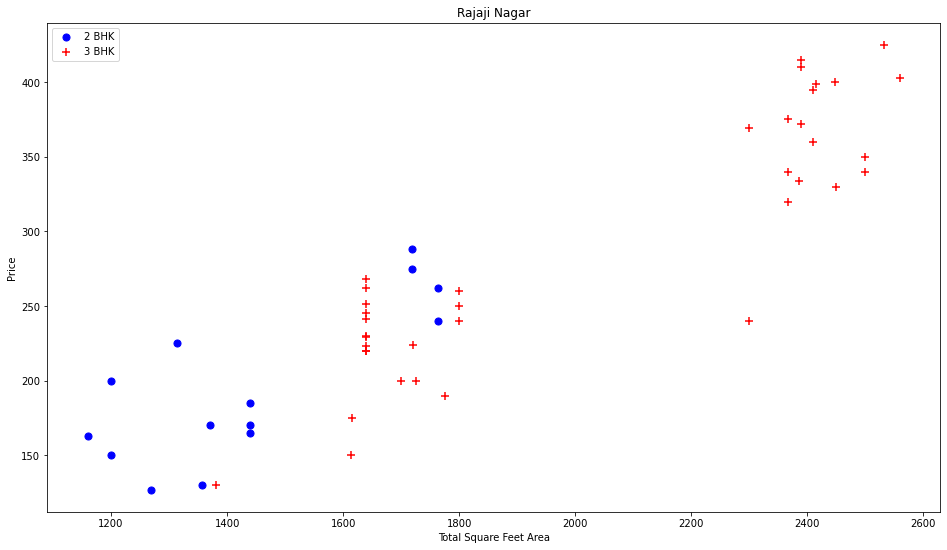

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")

# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

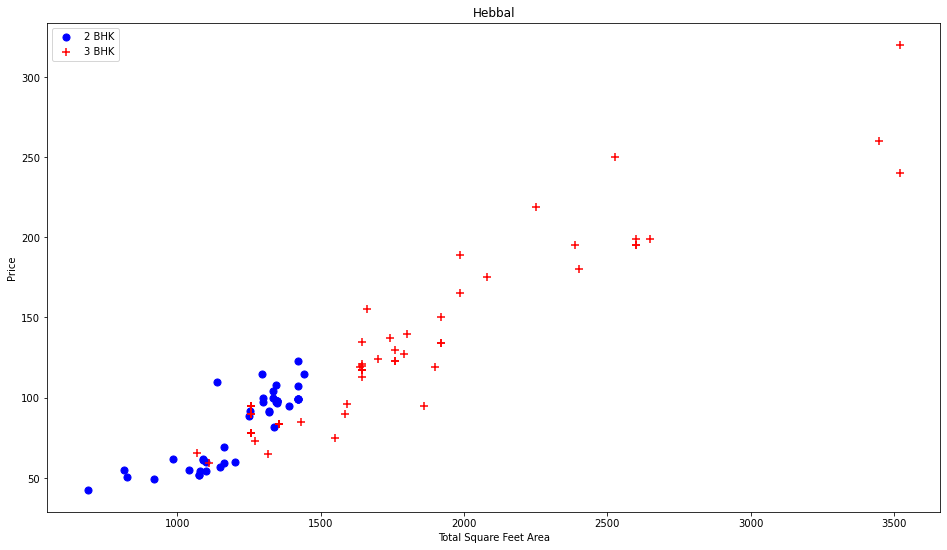

In [46]:
plot_scatter_chart(df9, "Hebbal")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

In [47]:
# Removing BHK outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_outliers(df9)
df10.shape

(7536, 11)

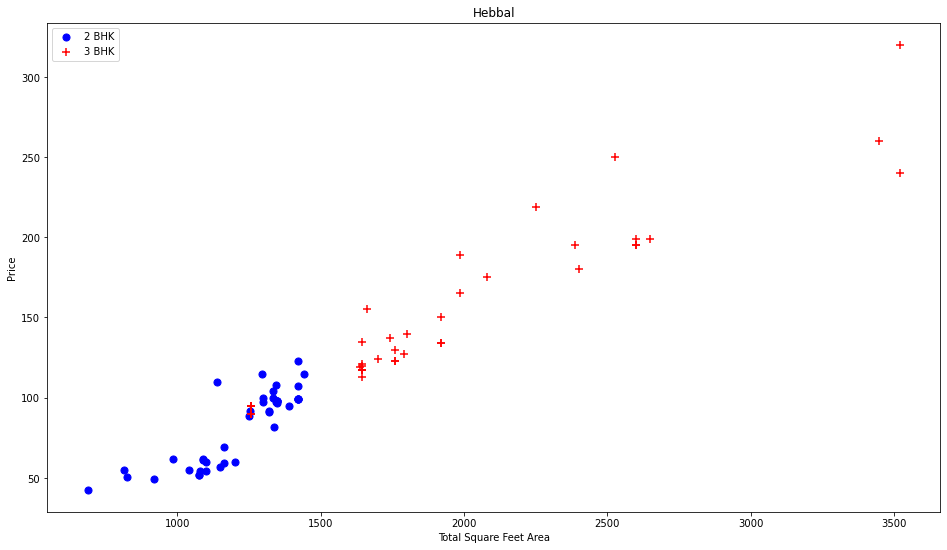

In [48]:
plot_scatter_chart(df10, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

### Remove outliers using the help of 'bath' feature

In [49]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [50]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
782,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,3300,14.0,1.584376,500.0,3300.0,9,15151.515152
1991,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
6150,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7479,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7961,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [51]:
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7456, 11)

C:\Users\vigya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vigya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vigya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vigya\anaconda3\lib\si

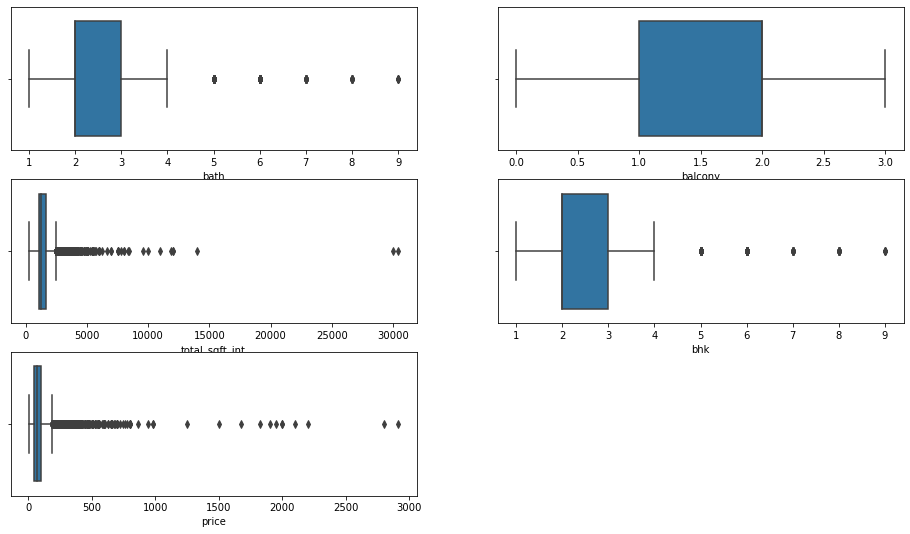

In [52]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])

In [53]:
# if we see many of our data now has less no. of outliers as compared to earlier

In [54]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [55]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [56]:
df12.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model train on this data and got best score >>>> XGBoost=0.914710

# Categorical Variable Encoding

In [57]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [58]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape

(7456, 846)

In [59]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Nov,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Andrahalli,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,locat

In [60]:
df14.to_csv('oh_encoded_data.csv', index=False) # test ml model on this data

In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE so it increase the size of DF 
so try to use those classes which are *frequently* present in the car var

## Working on <<<<<< area_type >>>>> feature

In [61]:
df13['area_type'].value_counts()

Super built-up  Area    5496
Built-up  Area          1389
Plot  Area               527
Carpet  Area              44
Name: area_type, dtype: int64

In [62]:
df13.shape

(7456, 9)

In [63]:
df15 = df13.copy()
# apply One-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
    df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

(7456, 12)

In [64]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0


## Working with <<<<< availability >>>>> Feature

In [65]:
df15["availability"].value_counts()

Ready To Move    5926
18-Dec            164
18-May            162
18-Apr            154
18-Aug            127
19-Dec            106
18-Jul             81
18-Mar             78
21-Dec             55
20-Dec             54
18-Jun             52
19-Mar             49
18-Feb             37
18-Nov             26
19-Jun             25
18-Oct             24
18-Sep             22
19-Jan             20
18-Jan             19
20-Jan             18
17-Dec             16
21-Jun             13
21-Mar             13
17-Oct             13
19-Sep             12
19-Jul             11
19-Aug             11
21-Jan             10
17-Jul             10
19-Apr              9
17-Jun              9
19-Oct              8
20-Jun              7
22-Dec              7
17-May              6
21-Jul              6
20-Oct              6
17-Sep              6
20-Aug              5
20-Sep              5
21-Feb              5
21-Sep              5
21-Oct              4
20-Nov              4
17-Nov              4
21-May    

In [66]:
# in availability feature, many houses 'Ready to Move" and remaining will be redy on perticular date
# so we crate new feature ""availability_Ready To Move"" and add value 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(7456, 13)

In [67]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
9309,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
9310,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
9311,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
9312,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0
9313,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0


## Working on <<<< Location >>>> feature

In [68]:
location_value_count = df15['location'].value_counts()
location_value_count

Whitefield                             237
Sarjapur  Road                         179
Electronic City                        161
Raja Rajeshwari Nagar                  140
Uttarahalli                            120
Haralur Road                           118
Marathahalli                           116
Bannerghatta Road                      109
Hennur Road                            108
Thanisandra                            103
Hebbal                                 102
Electronic City Phase II                93
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
Bellandur                               73
KR Puram                                63
Chandapura                              61
Harlur                                  59
Sarjapur                                57
Kasavanhalli                            53
Begur Road                              51
Banashankari                            50
Kothanur   

In [69]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Raja Rajeshwari Nagar', 'Uttarahalli', 'Haralur Road', 'Marathahalli',
       'Bannerghatta Road', 'Hennur Road', 'Thanisandra',
       ...
       'Horamavu Banaswadi', 'Hosur Road', 'BTM 2nd Stage', 'Basavangudi',
       'Hebbal Kempapura', 'Domlur', 'Mahadevpura', 'Tumkur Road', 'Kogilu',
       'Kammasandra'],
      dtype='object', length=102)

In [70]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
    df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

(7456, 115)

In [71]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Uttarahalli,location_Haralur Road,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Thanisandra,location_Hebbal,location_Electronic City Phase II,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_Bellandur,location_KR Puram,location_Chandapura,location_Harlur,location_Sarjapur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Rajaji Nagar,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Hennur,location_Ramamurthy Nagar,location_HSR Layout,location_Varthur,location_Hulimavu,location_Ramagondanahalli,location_Yeshwanthpur,location_Budigere,location_Kundalahalli,location_Koramangala,location_Kaggadasapura,location_Hoodi,location_8th Phase JP Nagar,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Bommasandra,location_Channasandra,location_Anekal,location_Gottigere,location_Indira Nagar,location_Vittasandra,location_Attibele,location_Kengeri,location_Sahakara Nagar,location_Bisuvanahalli,location_Brookefield,location_Old Airport Road,location_Vijayanagar,location_Hosa Road,location_Horamavu Agara,location_Green Glen Layout,location_Balagere,location_Panathur,location_Kengeri Satellite Town,location_9th Phase JP Nagar,location_Old Madras Road,location_Kudlu Gate,location_TC Palaya,location_Rachenahalli,location_Mysore Road,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Talaghattapura,location_Kadugodi,location_Devanahalli,location_Ananth Nagar,location_Kanakapura,location_Nagarbhavi,location_Frazer Town,location_Yelahanka New Town,location_Dodda Nekkundi,location_Jalahalli,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_CV Raman Nagar,location_Kudlu,location_Subramanyapura,location_Doddathoguru,location_Bhoganhalli,location_Kalena Agrahara,location_Vidyaranyapura,location_Horamavu Banaswadi,location_Hosur Road,location_BTM 2nd Stage,location_Basavangudi,location_Hebbal Kempapura,location_Domlur,location_Mahadevpura,location_Tumkur Road,location_Kogilu,location_Kammasandra
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Drop categorical variable

In [72]:
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape

(7456, 112)

In [73]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Raja Rajeshwari Nagar,location_Uttarahalli,location_Haralur Road,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Thanisandra,location_Hebbal,location_Electronic City Phase II,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_Bellandur,location_KR Puram,location_Chandapura,location_Harlur,location_Sarjapur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Rajaji Nagar,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Hennur,location_Ramamurthy Nagar,location_HSR Layout,location_Varthur,location_Hulimavu,location_Ramagondanahalli,location_Yeshwanthpur,location_Budigere,location_Kundalahalli,location_Koramangala,location_Kaggadasapura,location_Hoodi,location_8th Phase JP Nagar,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_Bommasandra,location_Channasandra,location_Anekal,location_Gottigere,location_Indira Nagar,location_Vittasandra,location_Attibele,location_Kengeri,location_Sahakara Nagar,location_Bisuvanahalli,location_Brookefield,location_Old Airport Road,location_Vijayanagar,location_Hosa Road,location_Horamavu Agara,location_Green Glen Layout,location_Balagere,location_Panathur,location_Kengeri Satellite Town,location_9th Phase JP Nagar,location_Old Madras Road,location_Kudlu Gate,location_TC Palaya,location_Rachenahalli,location_Mysore Road,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Talaghattapura,location_Kadugodi,location_Devanahalli,location_Ananth Nagar,location_Kanakapura,location_Nagarbhavi,location_Frazer Town,location_Yelahanka New Town,location_Dodda Nekkundi,location_Jalahalli,location_Lakshminarayana Pura,location_5th Phase JP Nagar,location_CV Raman Nagar,location_Kudlu,location_Subramanyapura,location_Doddathoguru,location_Bhoganhalli,location_Kalena Agrahara,location_Vidyaranyapura,location_Horamavu Banaswadi,location_Hosur Road,location_BTM 2nd Stage,location_Basavangudi,location_Hebbal Kempapura,location_Domlur,location_Mahadevpura,location_Tumkur Road,location_Kogilu,location_Kammasandra
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False) 

In [75]:
df17.shape

(7456, 112)